In [1]:
import  pandas as pd
import numpy as np

In [2]:
df =  pd.read_csv("nba_stats.csv")

In [3]:
df.shape

(15614, 53)

In [4]:
pd.isnull(df).sum()

season            0
player            0
pos               0
age               0
experience        0
lg_x              0
tm                0
g                 0
gs                0
mp                0
fg                0
fga               0
fg_percent        0
x3p               0
x3pa              0
x3p_percent       0
x2p               0
x2pa              0
x2p_percent       0
e_fg_percent_x    0
ft                0
fta               0
ft_percent        0
orb               0
drb               0
trb               0
ast               0
stl               0
blk               0
tov               0
pf                0
pts               0
pts_won           0
pts_max           0
share             0
team              0
w                 0
l                 0
pw                0
pl                0
mov               0
sos               0
srs               0
o_rtg             0
d_rtg             0
n_rtg             0
pace              0
f_tr              0
x3p_ar            0
ts_percent        0


In [5]:
df.select_dtypes(include = 'object').columns

Index(['player', 'pos', 'lg_x', 'tm', 'team'], dtype='object')

In [6]:
df.select_dtypes(include = [np.number]).columns

Index(['season', 'age', 'experience', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent_x', 'ft', 'fta', 'ft_percent', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'pts_won',
       'pts_max', 'share', 'w', 'l', 'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg',
       'd_rtg', 'n_rtg', 'pace', 'f_tr', 'x3p_ar', 'ts_percent', 'tov_percent',
       'orb_percent', 'ft_fga'],
      dtype='object')

In [7]:
df['season'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

MODELLING

In [9]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor


In [10]:
train = df[df['season'] <= 2022]
test = df[df['season'] == 2023]

In [11]:
#predictors contain categorical features
predictors = ['season', 'age', 'experience', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent_x', 'ft', 'fta', 'ft_percent', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
        'w', 'l', 'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg',
       'd_rtg', 'n_rtg', 'pace', 'f_tr', 'x3p_ar', 'ts_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'pos', 'team']



In [12]:
#defining the histogram estimators
hst = HistGradientBoostingRegressor(
    categorical_features =["pos", "team"], random_state = 42
)


In [19]:
hst.fit(train[predictors], train['share'])


HistGradientBoostingRegressor(categorical_features=['pos', 'team'],
                              random_state=42)

In [17]:
hst.set_params(loss='squared_error', max_depth=5, max_iter =150)

HistGradientBoostingRegressor(categorical_features=['pos', 'team'], max_depth=5,
                              max_iter=150, random_state=42)

In [17]:
preds = hst.predict(test[predictors])
preds = pd.DataFrame(preds, columns = ["predicted"], index = test.index)

result = pd.concat([test[['player', 'share']], preds], axis =1)

In [18]:
result.sort_values('predicted', ascending = False)

,player,share,predicted
15100,Jayson Tatum,0.280,0.663952
15362,Giannis Antetokounmpo,0.606,0.603496
15466,Joel Embiid,0.915,0.441183
15439,Shai Gilgeous-Alexander,0.046,0.232159
15214,Nikola Jokić,0.674,0.183423
...,...,...,...
15195,Kyrie Irving,0.000,-0.020808
15521,Harrison Barnes,0.000,-0.022576
15122,Mikal Bridges,0.000,-0.024837
15138,DeMar DeRozan,0.000,-0.025318


In [19]:
result = result.sort_values("share", ascending =False)
result['Rk'] = list(range(1, result.shape[0]+1))

result = result.sort_values("predicted", ascending =False).head(10)
result['preds_Rk'] = list(range(1, result.shape[0]+1))

In [20]:
result 

,player,share,predicted,Rk,preds_Rk
15100,Jayson Tatum,0.280,0.663952,4,1
15362,Giannis Antetokounmpo,0.606,0.603496,3,2
15466,Joel Embiid,0.915,0.441183,1,3
15439,Shai Gilgeous-Alexander,0.046,0.232159,5,4
15214,Nikola Jokić,0.674,0.183423,2,5
15171,Donovan Mitchell,0.030,0.169927,6,6
15099,Jaylen Brown,0.000,0.117386,350,7
15090,Trae Young,0.000,0.104444,359,8
15418,Julius Randle,0.000,0.065199,111,9
15196,Luka Dončić,0.010,0.064541,8,10


METRICS

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mea = mean_absolute_error(result['share'], result['predicted'])
mea
#At top 10, the model is ~20% wrong

0.2018506254418772

In [24]:
#custom averaged precision
def find_ap(result):
    actual = result.sort_values('share', ascending = False).head(6)
    predicted = result.sort_values('predicted', ascending = False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row['player'] in actual['player'].values:
            found += 1
            ps.append(found/seen)

        seen += 1
    return sum(ps)/len(ps)

In [24]:
find_ap(result)

1.0

OPTIMIZING PARAMETERS

In [25]:
hst.get_params()

{'categorical_features': ['pos', 'team'],
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': 5,
 'max_features': 1.0,
 'max_iter': 150,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'quantile': None,
 'random_state': 42,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [28]:
#Aim to obtain ~10% mean absolute error
from sklearn.model_selection import GridSearchCV, RepeatedKFold
param_grid = {
    'max_depth' : [5,10, 15,25],
    'max_iter' : [50,75, 100, 150],
    'loss' : ['squared_error', 'absolute_error']  
}

cv = RepeatedKFold(n_splits =2, n_repeats =5, random_state=42)

grid = GridSearchCV(hst, param_grid = param_grid, cv=cv)

In [29]:
grid

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=2, random_state=42),
             estimator=HistGradientBoostingRegressor(categorical_features=['pos',
                                                                           'team'],
                                                     random_state=42),
             param_grid={'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 10, 15, 25],
                         'max_iter': [50, 75, 100, 150]})

In [30]:
grid.fit(train[predictors], train['share'])

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=2, random_state=42),
             estimator=HistGradientBoostingRegressor(categorical_features=['pos',
                                                                           'team'],
                                                     random_state=42),
             param_grid={'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 10, 15, 25],
                         'max_iter': [50, 75, 100, 150]})

In [31]:
grid.best_params_

{'loss': 'squared_error', 'max_depth': 5, 'max_iter': 150}

In [32]:
grid.best_estimator_

HistGradientBoostingRegressor(categorical_features=['pos', 'team'], max_depth=5,
                              max_iter=150, random_state=42)

BACKTESTING

In [25]:
years = list(range(1991, 2024))

In [26]:
def backtest(df, model, year, predictions):
    aps = []
    all_predictions  = []
    for year in years[5:]:
        train = df[df['season'] < year]
        test = df[df['season'] == year]
        model.fit(train[predictors], train['share'])
        prediction = model.predict(test[predictors])
        prediction  = pd.DataFrame(prediction, columns = ['predicted'], index = test.index)
        result = pd.concat([test[['player', 'season', 'share']], prediction], axis =1)

        result = result.sort_values('share', ascending= False)
        result['Rk'] = list(range(1, result.shape[0] +1))
        result = result.sort_values('predicted', ascending= False).head(10)
        result['preds_Rk'] = list(range(1, result.shape[0] +1))
        result['diff'] = result['Rk'] - result['preds_Rk']
    
        all_predictions.append(result)
        aps.append(find_ap(result))

    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [30]:
mean_aps, aps, prediction = backtest(df, hst, years[5:], predictors)

In [31]:
prediction

,player,season,share,predicted,Rk,preds_Rk,diff
2405,Michael Jordan,1996,0.986,0.644927,1,1,0
2742,Karl Malone,1996,0.075,0.529927,7,2,5
2694,David Robinson,1996,0.508,0.451935,2,3,-1
2613,Anfernee Hardaway,1996,0.319,0.317664,3,4,-1
2711,Shawn Kemp,1996,0.065,0.190957,8,5,3
...,...,...,...,...,...,...,...
15171,Donovan Mitchell,2023,0.030,0.169927,6,6,0
15099,Jaylen Brown,2023,0.000,0.117386,350,7,343
15090,Trae Young,2023,0.000,0.104444,359,8,351
15418,Julius Randle,2023,0.000,0.065199,111,9,102


In [32]:
mean_aps
#over the years baacktesting, the model maintains a 0.90% predictions for top 10 MVP 

0.9024022108843538

In [33]:
#Obtain players for MVP predicted each year

mvp = prediction.groupby('season', group_keys = False)

mvp.get_group(2021)

,player,season,share,predicted,Rk,preds_Rk,diff
14070,Nikola Jokić,2021,0.961,0.430861,1,1,0
14358,Devin Booker,2021,0.000,0.198143,219,2,217
14050,Luka Dončić,2021,0.042,0.127693,6,3,3
14227,Giannis Antetokounmpo,2021,0.345,0.120141,4,4,0
14469,Russell Westbrook,2021,0.005,0.103383,11,5,6
14450,Rudy Gobert,2021,0.008,0.093696,10,6,4
14340,Joel Embiid,2021,0.580,0.047653,2,7,-5
14355,Chris Paul,2021,0.138,0.043072,5,8,-3
14372,Damian Lillard,2021,0.038,0.042010,7,9,-2
14273,Zion Williamson,2021,0.000,0.034380,73,10,63


EVALUATING THE MODEL

In [34]:
from sklearn.inspection import permutation_importance

In [35]:
train_importance = permutation_importance(
    hst, train[predictors], train['share'], random_state = 42, n_repeats = 10, n_jobs = 2
)

test_importance = permutation_importance(
    hst, test[predictors], test['share'], random_state = 42, n_repeats = 10, n_jobs = 2
)


In [36]:
train_importance.importances.reshape(-1,1)

array([[ 1.44811363e-03],
       [ 9.86464800e-04],
       [ 8.37188971e-04],
       [ 1.33335647e-03],
       [ 1.01039733e-03],
       [ 8.44134066e-04],
       [ 1.06542675e-03],
       [ 8.72077554e-04],
       [ 7.00896328e-04],
       [ 1.11216774e-03],
       [ 1.73962785e-04],
       [ 3.54271159e-04],
       [ 1.39483467e-04],
       [ 7.33069403e-05],
       [ 3.50798100e-06],
       [ 1.15432814e-04],
       [ 3.19853835e-04],
       [-1.07882069e-04],
       [ 1.54117038e-04],
       [ 8.34029282e-05],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 7.43395463e-03],
       [ 9.30817777e-03],
       [ 1.13815203e-02],
       [ 1.01718380e-02],
       [ 8.05198555e-03],
       [ 7.81734423e-03],
       [ 8.55532019e-03],
       [ 8.75224922e-03],
       [ 6.4

In [37]:
tst = test_importance['importances_mean'].reshape(-1,1)
tst = pd.DataFrame(tst, columns=['test'])

prd = test[predictors].columns
prd = pd.DataFrame(prd, columns =['prd'])

trn = train_importance['importances_mean'].reshape(-1,1)
trn = pd.DataFrame(trn, columns=['train'])

prd_1 = train[predictors].columns
prd_1 = pd.DataFrame(prd_1, columns =['prd'])

In [38]:
train_imptnce= prd_1.merge(trn, how='outer', on=prd_1.index)
train_imptnce = train_imptnce.drop('key_0', axis=1)
train_imptnce = train_imptnce.sort_values('train', ascending= False)

test_imptnce= prd.merge(tst, how='outer', on=prd.index)
test_imptnce = test_imptnce.drop('key_0', axis = 1)
test_imptnce = test_imptnce.sort_values('test', ascending=False)

In [39]:
train_imptnce
#the model weighs some "important" features very low during training
#features such as : experience, age, position
#Loss(l) has a significant weight during training

,prd,train
27,pts,0.392673
29,l,0.156172
6,fg,0.110732
17,fta,0.076525
22,ast,0.070368
34,srs,0.025575
28,w,0.024700
5,mp,0.024253
20,drb,0.016929
21,trb,0.015085


In [40]:
test_imptnce
#some important features are weighted very very low on the testing set
#Win(w), percent_win(pw), steal, block, assist, game_start(gs) among others are negative for the model

#what can be the correction to assign proper weight to features that influence the Target positively or negatively??
#Monotonic Constraints!!

,prd,test
27,pts,2.335398e-01
17,fta,5.981949e-02
8,fg_percent,5.340742e-02
29,l,4.948543e-02
21,trb,4.088631e-02
46,team,3.834525e-02
7,fga,3.322384e-02
5,mp,2.356932e-02
20,drb,2.185132e-02
16,ft,2.033015e-02


In [41]:
top_features_training = train_imptnce.head(20)
top_features_testing = test_imptnce.head(20)


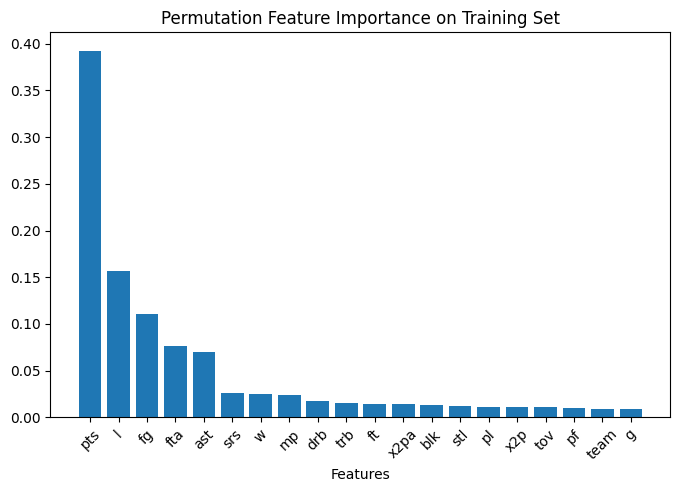

In [42]:
import matplotlib.pyplot as plt
#visualising important features during training and testing

plt.figure(figsize = (8,5))
plt.bar(x=top_features_training['prd'], height= top_features_training['train'])
plt.xticks(rotation=45)
plt.title('Permutation Feature Importance on Training Set')
plt.xlabel('Features')

plt.show()

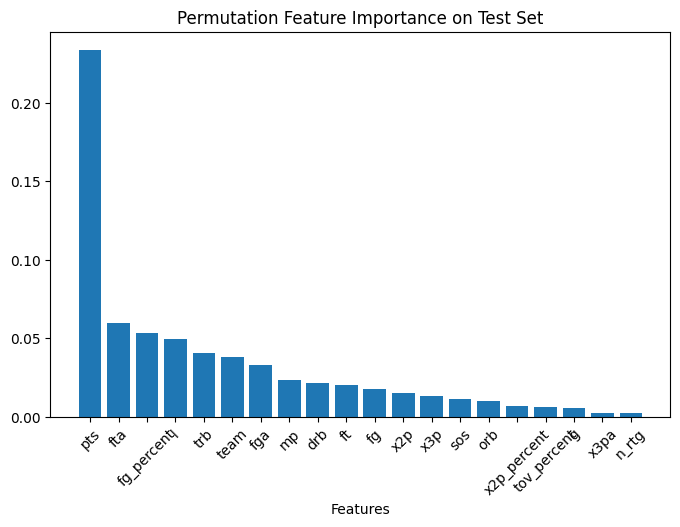

In [43]:
plt.figure(figsize = (8,5))
plt.bar(x=top_features_testing['prd'], height= top_features_testing['test'])
plt.xticks(rotation=45)
plt.title('Permutation Feature Importance on Test Set')
plt.xlabel('Features')
plt.show()

In [44]:
least_features_train = train_imptnce.tail(20)
least_features_test = test_imptnce.tail(20)

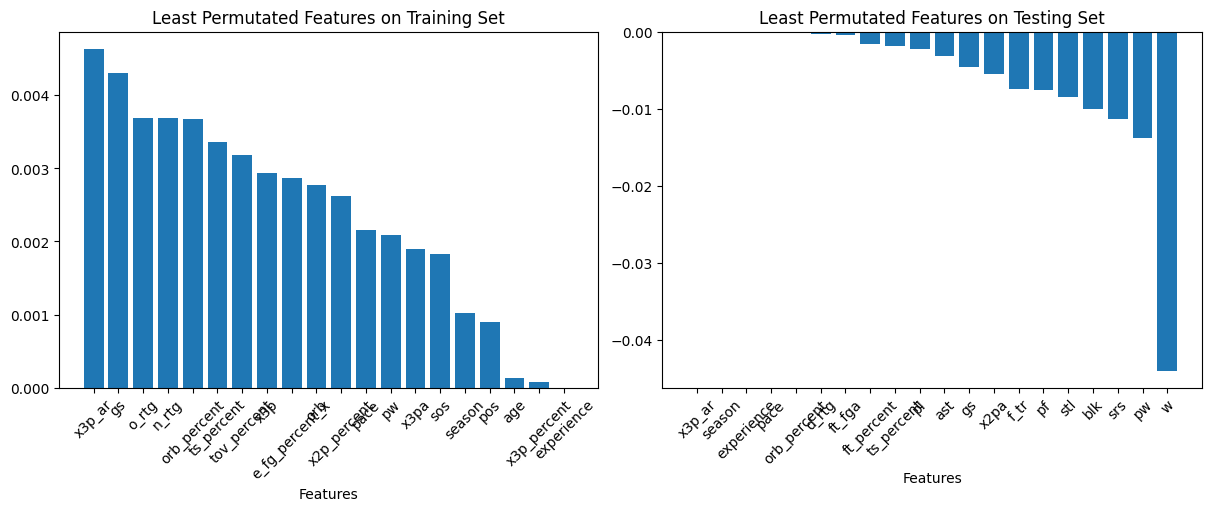

In [48]:
#Visualising the least performing features on training and test set

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, layout='constrained', figsize=(12,5))

ax1.bar(x=least_features_train['prd'], height=least_features_train['train'])
ax1.set_title("Least Permutated Features on Training Set")
ax1.set_xlabel("Features")


ax2.bar(x=least_features_test['prd'], height= least_features_test['test'])
ax2.set_title("Least Permutated Features on Testing Set")
ax2.set_xlabel("Features")

#slant the xticks on both axes
for i, ax in enumerate([ax1, ax2]):
    ax.set_xticks(ax.get_xticks()) # setting the ticks first before..
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  #x_ticklabel modifications

plt.show()

In [49]:
for i, ax in enumerate([ax1, ax2]):
    print(ax)

#why did the xtick_rotation only app

Axes(0.044491,0.235203;0.449311x0.711796)
Axes(0.547216,0.235203;0.449311x0.711796)


FEATURE SELECTION ON THE MODEL

In [84]:
#Incomplete Procedure: still needs work

from sklearn.feature_selection import SelectKBest,f_regression, RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline, Pipeline

In [65]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

preprocess = make_column_transformer(
    (one_hot, ['pos', 'team']),
    remainder="passthrough"
)
select = SelectKBest(f_regression, k=25)

pipe = make_pipeline(
    preprocess,
    select,
    hst
)

In [67]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['pos', 'team'])])),
                ('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_regression at 0x0000022D696AA700>)),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=['pos',
                                                                     'team'],
                                               max_depth=5, max_iter=150,
                                               random_state=42))])

In [ ]:
pipe.fit(train[predictors], train['share'])

In [85]:
#another feature selection method with RFECV, lASSO AND HST`
cv = RepeatedKFold(n_splits =2, n_repeats =5, random_state=42)

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

preprocess = make_column_transformer(
    (one_hot, ['pos', 'team']),
    remainder="passthrough"
)
select = RFECV(hst, min_features_to_select=25, cv=cv, n_jobs=2)

pipe = make_pipeline(
    preprocess,
    select,
    hst
)

In [86]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['pos', 'team'])])),
                ('rfecv',
                 RFECV(cv=RepeatedKFold(n_repeats=5, n_splits=2, random_state=42),
                       estimator=HistGradientBoostingRegressor(categorical_features=['pos',
                                                                                     'team'],
                                                               max_depth=5,
                                                               max_iter=150,
                                                               random_state=42),
                       min_features_to_select=25, n_jobs=2)),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=['pos',
                                                                     'team'],
                                               max_depth=5, max_iter=150,
                                               random_state=42))])

In [ ]:
pipe.fit(train[predictors], train['share'])

In [ ]:
#Tried two Feature_selection methods but both resulted in error
#ValueError: categorical_features should be passed as an array of integers or as a boolean mask when the model is fitted on data without feature names.
#The involvement of categorical features makes it hard to pass the predictors through the model


RANDOM FOREST

In [34]:
#defining randomforest estimator
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

rdf = RandomForestRegressor(
    n_estimators = 1000,
    n_jobs = 2,
    random_state = 42 
)

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

preprocess = make_column_transformer(
    (one_hot, ['pos', 'team']),
    remainder="passthrough"
)

rf_pipe = make_pipeline(
    preprocess,
   rdf 
)

In [35]:
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['pos', 'team'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1000, n_jobs=2,
                                       random_state=42))])

In [ ]:
rf_pipe.fit(train[predictors], train['share'])

#contiues to raise error
#TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'p' (type <class 'str'>) doesn't.

In [ ]:
new_pred = rf_pipe.predict(test[predictors])

In [ ]:
mean_aps2, aps2, preds_rf = backtest(df, rf_pipe, 1996, predictors) 

In [ ]:
mean_aps2